# How to load an audio file

In [1]:
import librosa

signal, sample_rate = librosa.load("Data/genres_original/blues/blues.00000.wav")

In [2]:
signal #from this data we have to extract features like from individual assignemnt 3

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [3]:
sample_rate  #another figure that will help represent data

22050

# How to load an image file

In [4]:
import cv2 as cv

img = cv.imread("Data/images_original/blues/blues00000.png")

img = cv.resize(img, (64, 64))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# print(gray.flatten())


In [5]:
def deleteFiles(folder_path):
    print(f"Deleting old files in {folder_path}")
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


# Randomly makes training and testing data

### Audio

In [6]:
import os
import random
import shutil

dataPath = 'Data'

trainSplit = 0.70


path = os.path.join(dataPath, 'genres_original')

genres = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

for genre in genres:
    path = os.path.join(dataPath, 'genres_original', genre)
    files = os.listdir(path)
    
    random.shuffle(files)
    
    num_train_samples = int(len(files) * trainSplit)
    train_samples = files[:num_train_samples]
    test_samples = files[num_train_samples:]
#     print(len(train_samples))
#     print(len(test_samples))

    train_path = os.path.join(dataPath, "audio_training_data", genre)
    test_path = os.path.join(dataPath, "audio_testing_data", genre)
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    if len(os.listdir(train_path)) > 0:
        deleteFiles(train_path)
    for sample in train_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(train_path, sample)
        shutil.copy(src_path, dst_path)
        
    if len(os.listdir(train_path)) > 0:
        deleteFiles(test_path)    
    for sample in test_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(test_path, sample)
        shutil.copy(src_path, dst_path)

Deleting old files in Data\audio_testing_data\blues
Deleting old files in Data\audio_testing_data\classical
Deleting old files in Data\audio_testing_data\country
Deleting old files in Data\audio_testing_data\disco
Deleting old files in Data\audio_testing_data\hiphop
Deleting old files in Data\audio_testing_data\jazz
Deleting old files in Data\audio_testing_data\metal
Deleting old files in Data\audio_testing_data\pop
Deleting old files in Data\audio_testing_data\reggae
Deleting old files in Data\audio_testing_data\rock


### Images

In [7]:
import os
import random
import shutil

dataPath = 'Data'

trainSplit = 0.70


path = os.path.join(dataPath, 'images_original')

genres = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

for genre in genres:
    path = os.path.join(dataPath, 'images_original', genre)
    files = os.listdir(path)
    
    random.shuffle(files)
    
    num_train_samples = int(len(files) * trainSplit)
    train_samples = files[:num_train_samples]
    test_samples = files[num_train_samples:]
#     print(len(train_samples))
#     print(len(test_samples))

    train_path = os.path.join(dataPath, "image_training_data", genre)
    test_path = os.path.join(dataPath, "image_testing_data", genre)
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    if len(os.listdir(train_path)) > 0:
        deleteFiles(train_path)
    for sample in train_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(train_path, sample)
        shutil.copy(src_path, dst_path)
        
    if len(os.listdir(train_path)) > 0:
        deleteFiles(test_path)    
    for sample in test_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(test_path, sample)
        shutil.copy(src_path, dst_path)

Deleting old files in Data\image_training_data\blues
Deleting old files in Data\image_testing_data\blues
Deleting old files in Data\image_training_data\classical
Deleting old files in Data\image_testing_data\classical
Deleting old files in Data\image_training_data\country
Deleting old files in Data\image_testing_data\country
Deleting old files in Data\image_training_data\disco
Deleting old files in Data\image_testing_data\disco
Deleting old files in Data\image_training_data\hiphop
Deleting old files in Data\image_testing_data\hiphop
Deleting old files in Data\image_training_data\jazz
Deleting old files in Data\image_testing_data\jazz
Deleting old files in Data\image_training_data\metal
Deleting old files in Data\image_testing_data\metal
Deleting old files in Data\image_training_data\pop
Deleting old files in Data\image_testing_data\pop
Deleting old files in Data\image_training_data\reggae
Deleting old files in Data\image_testing_data\reggae
Deleting old files in Data\image_training_dat

## Dataset comes with features, uses these

In [8]:
import csv

X_train = []
Y_train = []
X_test = []
Y_test = []

with open('Data/features_30_sec.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(reader)

    
    i = 0
    for row in reader:
        imgPath = "Data/images_original/" + row[0].split('.')[0] + "/" + row[0].split('.')[0] + row[0].split('.')[1] + ".png"
#         print(imgPath)
        img = cv.imread(imgPath)
        
        img = cv.resize(img, (128, 128))

        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#         for val in gray.flatten():
#             row.insert(-1, val)

        if(i % 100 < 100 * trainSplit):
            Y_train.append(row[0].split('.')[0])    
            X_train.append(row[1:-1])
        else:
            Y_test.append(row[0].split('.')[0])    
            X_test.append(row[1:-1])
        
        i+=1
        
X_train = [[float(item) if isinstance(item, str) else item for item in items] for items in X_train]
X_test = [[float(item) if isinstance(item, str) else item for item in items] for items in X_test]



print(len(Y_train))
print(len(X_train))
print(len(Y_test))
print(len(X_test))
print((X_train[:1]))

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import os
import random
import shutil
import librosa
# import librosa.display #this is the dumbest import ever that breaks everything
#https://github.com/matplotlib/matplotlib/issues/25506
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report



In [ ]:
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# print(type(X_train[0][0]))

svc.fit(X_train, Y_train)
nbc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(Y_test, y_svc_predicted))
print(classification_report(Y_test, y_nbc_predicted))
print(classification_report(Y_test, y_rfc_predicted))

models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [ y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]
#setting up info needed to display the graphs
plot = 1


for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    # zipping the arrays to be able to access the nth element of each at the same time
    disp = ConfusionMatrixDisplay(confusion_matrix(np.array(Y_test).ravel(), prediction), display_labels=genres)
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.figure_.set_size_inches(10,8)
    disp.ax_.set_title(f"{model} Confusion Matrix")
    #actually displaying the models and setting up their axis info


# Exploratory Data Analysis

### Audio Data

First we have to import all the data 

In [ ]:
import librosa
 
    
def read_audio(folder_name):
    signals = []
    sample_rate = 0
    for filename in os.listdir("angry"):
        f = os.path.join("angry", filename)
        if os.path.isfile(f):
            signal, sample_rate = librosa.load(f)
            angry_signals.append(signal)
            angry_sample_rate = sample_rate
    
angry_signals = []
angry_sample_rate = 0
for filename in os.listdir("angry"):
    f = os.path.join("angry", filename)
    if os.path.isfile(f):
        signal, sample_rate = librosa.load(f)
        angry_signals.append(signal)
        angry_sample_rate = sample_rate


fear_signals = []
fear_sample_rate = 0
for filename in os.listdir("fear"):
    f = os.path.join("fear", filename)
    if os.path.isfile(f):
        signal, sample_rate = librosa.load(f)
        fear_signals.append(signal)
        fear_sample_rate = sample_rate
        


happy_signals = []
happy_sample_rate = 0
for filename in os.listdir("happy"):
    f = os.path.join("happy", filename)
    if os.path.isfile(f):
        signal, sample_rate = librosa.load(f)
        happy_signals.append(signal)
        happy_sample_rate = sample_rate
        
        

sad_signals = []
sad_sample_rate = 0
for filename in os.listdir("sad"):
    f = os.path.join("sad", filename)
    if os.path.isfile(f):
        signal, sample_rate = librosa.load(f)
        sad_signals.append(signal)
        sad_sample_rate = sample_rate

### Image Data

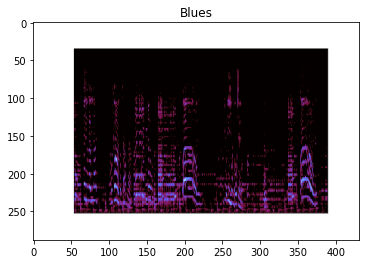

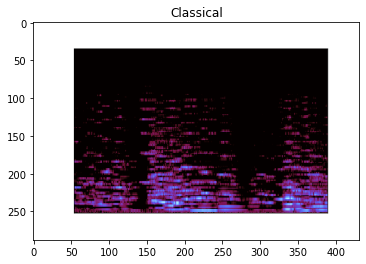

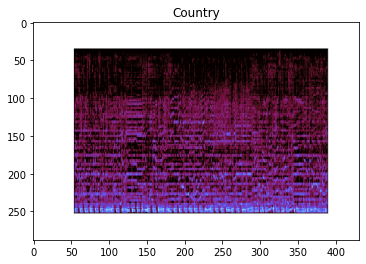

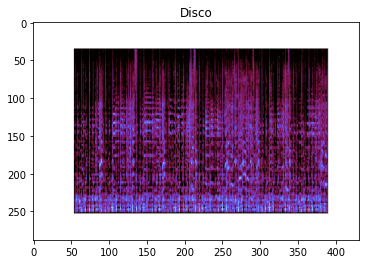

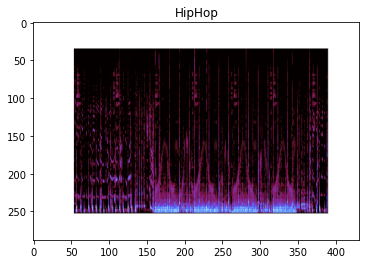

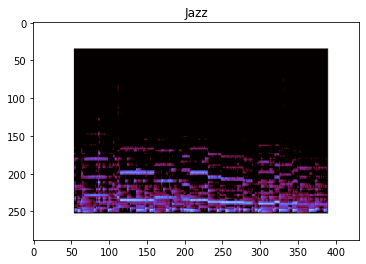

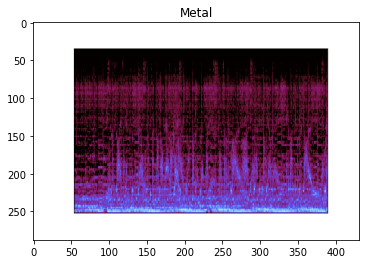

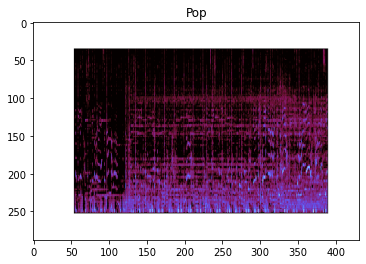

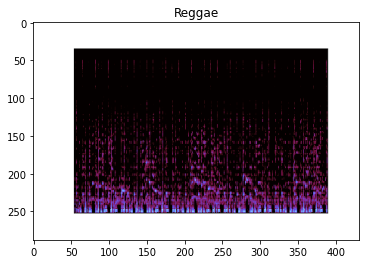

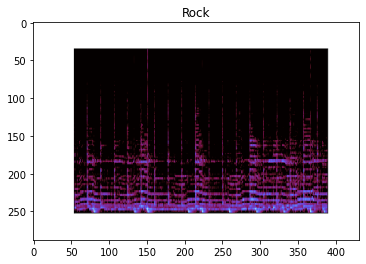

In [9]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("Data/images_original/blues/blues00009.png")
img2 = cv2.imread("Data/images_original/classical/classical00009.png")
img3 = cv2.imread("Data/images_original/country/country00009.png")
img4 = cv2.imread("Data/images_original/disco/disco00009.png")
img5 = cv2.imread("Data/images_original/hiphop/hiphop00009.png")
img6 = cv2.imread("Data/images_original/jazz/jazz00009.png")
img7 = cv2.imread("Data/images_original/metal/metal00009.png")
img8 = cv2.imread("Data/images_original/pop/pop00009.png")
img9 = cv2.imread("Data/images_original/reggae/reggae00009.png")
img10 = cv2.imread("Data/images_original/rock/rock00009.png")


imgplot1 = plt.imshow(img1)
plt.title("Blues")

plt.figure()
imgplot2 = plt.imshow(img2)
plt.title("Classical")

plt.figure()
imgplot3 = plt.imshow(img3)
plt.title("Country")

plt.figure()
imgplot4 = plt.imshow(img4)
plt.title("Disco")

plt.figure()
imgplot5 = plt.imshow(img5)
plt.title("HipHop")

plt.figure()
imgplot6 = plt.imshow(img6)
plt.title("Jazz")

plt.figure()
imgplot7 = plt.imshow(img7)
plt.title("Metal")

plt.figure()
imgplot8 = plt.imshow(img8)
plt.title("Pop")

plt.figure()
imgplot9 = plt.imshow(img9)
plt.title("Reggae")

plt.figure()
imgplot10 = plt.imshow(img10)
plt.title("Rock")

plt.show()

Here I print a spectrogram image from each genre just to observe in general each will look like. They all follow the same trend but have very different patterns as to be expected. The colors are slightly faded from when I view the pictures normally but overall the pictures are read in quite well

We can inspect the pictures further by inspecting the properties of the images

In [10]:
# image properties
print("Type:",type(img1))
print("Shape of Image:", img1.shape)
print('Total Number of pixels:', img1.size)
print("Image data type:", img1.dtype)

# print("Pixel Values:\n", img)
print("Dimension:", img1.ndim)

Type: <class 'numpy.ndarray'>
Shape of Image: (288, 432, 3)
Total Number of pixels: 373248
Image data type: uint8
Dimension: 3


This is pretty standard for images which means that it is time to extract some features

# Feature Extraction

### Images

In [11]:
For training

SyntaxError: invalid syntax (<ipython-input-11-fc393f7cac8c>, line 1)

In [12]:
import cv2
import os
 
    
blues = []
for filename in os.listdir("Data/image_training_data/blues"):
    f = os.path.join("Data/image_training_data/blues", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        blues.append(img)

classical = []
for filename in os.listdir("Data/image_training_data/classical"):
    f = os.path.join("Data/image_training_data/classical", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        classical.append(img)
        
country = []
for filename in os.listdir("Data/image_training_data/country"):
    f = os.path.join("Data/image_training_data/country", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        country.append(img)
        
disco = []
for filename in os.listdir("Data/image_training_data/disco"):
    f = os.path.join("Data/image_training_data/disco", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        disco.append(img)
        
hiphop = []
for filename in os.listdir("Data/image_training_data/hiphop"):
    f = os.path.join("Data/image_training_data/hiphop", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        hiphop.append(img)
        
jazz = []
for filename in os.listdir("Data/image_training_data/jazz"):
    f = os.path.join("Data/image_training_data/jazz", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        jazz.append(img)
        
metal = []
for filename in os.listdir("Data/image_training_data/metal"):
    f = os.path.join("Data/image_training_data/metal", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        metal.append(img)
        
pop = []
for filename in os.listdir("Data/image_training_data/pop"):
    f = os.path.join("Data/image_training_data/pop", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        pop.append(img)
        
reggae = []
for filename in os.listdir("Data/image_training_data/reggae"):
    f = os.path.join("Data/image_training_data/reggae", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        reggae.append(img)
        
rock = []
for filename in os.listdir("Data/image_training_data/rock"):
    f = os.path.join("Data/image_training_data/rock", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        rock.append(img)
        
list_of_lists = [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
training_images = []

for sublist in list_of_lists:
    training_images.extend(sublist)
        

In [13]:
blues = []
for filename in os.listdir("Data/image_testing_data/blues"):
    f = os.path.join("Data/image_testing_data/blues", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        blues.append(img)

classical = []
for filename in os.listdir("Data/image_testing_data/classical"):
    f = os.path.join("Data/image_testing_data/classical", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        classical.append(img)
        
country = []
for filename in os.listdir("Data/image_testing_data/country"):
    f = os.path.join("Data/image_testing_data/country", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        country.append(img)
        
disco = []
for filename in os.listdir("Data/image_testing_data/disco"):
    f = os.path.join("Data/image_testing_data/disco", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        disco.append(img)
        
hiphop = []
for filename in os.listdir("Data/image_testing_data/hiphop"):
    f = os.path.join("Data/image_testing_data/hiphop", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        hiphop.append(img)
        
jazz = []
for filename in os.listdir("Data/image_testing_data/jazz"):
    f = os.path.join("Data/image_testing_data/jazz", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        jazz.append(img)
        
metal = []
for filename in os.listdir("Data/image_testing_data/metal"):
    f = os.path.join("Data/image_testing_data/metal", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        metal.append(img)
        
pop = []
for filename in os.listdir("Data/image_testing_data/pop"):
    f = os.path.join("Data/image_testing_data/pop", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        pop.append(img)
        
reggae = []
for filename in os.listdir("Data/image_testing_data/reggae"):
    f = os.path.join("Data/image_testing_data/reggae", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        reggae.append(img)
        
rock = []
for filename in os.listdir("Data/image_testing_data/rock"):
    f = os.path.join("Data/image_testing_data/rock", filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        rock.append(img)
        
list_of_lists = [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
testing_images = []

for sublist in list_of_lists:
    testing_images.extend(sublist)

The image data is now perfectly split into lists and ready for feature extraction

In [14]:
import numpy as np
import pandas as pd
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from skimage.feature import local_binary_pattern
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


def extract_color_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 1, 8)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    return hist

def extract_cnn_features(img):
    model = ResNet50(weights='imagenet', include_top=False)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    flattened_features = features.flatten()
    return flattened_features

feature1 = []
feature2 = []
feature3 = []
feature4 = []
label = []

labels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

i = 1

for image in training_images:
    # Extract features
    hist = extract_color_histogram(image)
    lbp = extract_lbp_features(image)
    cnn = extract_cnn_features(image)

    #store features
    feature1.append(hist.mean())
    feature2.append(lbp[0])
    feature4.append(lbp[1])
    feature3.append(cnn.mean())
    label.append(labels[i // 70])
    
    print("Image ", i, " done of ", len(training_images))
    i += 1
    

training_image_features = pd.DataFrame({'Genre': label,
                               'Color Histogram': feature1,
                               'LBP1': feature2,
                               'LBP2': feature4,
                               'CNN': feature3})

1/1 [==============================] - 1s 1s/step
Image  1  done of  699
1/1 [==============================] - 1s 1s/step
Image  2  done of  699
1/1 [==============================] - 1s 1s/step
Image  3  done of  699
1/1 [==============================] - 1s 1s/step
Image  4  done of  699
1/1 [==============================] - 1s 1s/step
Image  5  done of  699
1/1 [==============================] - 1s 1s/step
Image  6  done of  699
1/1 [==============================] - 1s 1s/step
Image  7  done of  699
1/1 [==============================] - 1s 1s/step
Image  8  done of  699
1/1 [==============================] - 1s 1s/step
Image  9  done of  699
1/1 [==============================] - 1s 1s/step
Image  10  done of  699
1/1 [==============================] - 1s 1s/step
Image  11  done of  699
1/1 [==============================] - 1s 1s/step
Image  12  done of  699
1/1 [==============================] - 1s 1s/step
Image  13  done of  699
1/1 [==============================] - 1s 1s/st

1/1 [==============================] - 1s 1s/step
Image  93  done of  699
1/1 [==============================] - 1s 1s/step
Image  94  done of  699
1/1 [==============================] - 1s 1s/step
Image  95  done of  699
1/1 [==============================] - 1s 1s/step
Image  96  done of  699
1/1 [==============================] - 1s 1s/step
Image  97  done of  699
1/1 [==============================] - 1s 1s/step
Image  98  done of  699
1/1 [==============================] - 1s 1s/step
Image  99  done of  699
1/1 [==============================] - 1s 1s/step
Image  100  done of  699
1/1 [==============================] - 1s 1s/step
Image  101  done of  699
1/1 [==============================] - 1s 1s/step
Image  102  done of  699
1/1 [==============================] - 1s 1s/step
Image  103  done of  699
1/1 [==============================] - 1s 1s/step
Image  104  done of  699
1/1 [==============================] - 1s 1s/step
Image  105  done of  699
1/1 [===========================

1/1 [==============================] - 1s 1s/step
Image  202  done of  699
1/1 [==============================] - 1s 1s/step
Image  203  done of  699
1/1 [==============================] - 1s 1s/step
Image  204  done of  699
1/1 [==============================] - 1s 1s/step
Image  205  done of  699
1/1 [==============================] - 1s 1s/step
Image  206  done of  699
1/1 [==============================] - 1s 1s/step
Image  207  done of  699
1/1 [==============================] - 1s 1s/step
Image  208  done of  699
1/1 [==============================] - 1s 1s/step
Image  209  done of  699
1/1 [==============================] - 1s 1s/step
Image  210  done of  699
1/1 [==============================] - 1s 1s/step
Image  211  done of  699
1/1 [==============================] - 1s 1s/step
Image  212  done of  699
1/1 [==============================] - 1s 1s/step
Image  213  done of  699
1/1 [==============================] - 1s 1s/step
Image  214  done of  699
1/1 [====================

1/1 [==============================] - 1s 1s/step
Image  311  done of  699
1/1 [==============================] - 1s 1s/step
Image  312  done of  699
1/1 [==============================] - 1s 1s/step
Image  313  done of  699
1/1 [==============================] - 1s 1s/step
Image  314  done of  699
1/1 [==============================] - 1s 1s/step
Image  315  done of  699
1/1 [==============================] - 1s 1s/step
Image  316  done of  699
1/1 [==============================] - 1s 1s/step
Image  317  done of  699
1/1 [==============================] - 1s 1s/step
Image  318  done of  699
1/1 [==============================] - 1s 1s/step
Image  319  done of  699
1/1 [==============================] - 1s 1s/step
Image  320  done of  699
1/1 [==============================] - 1s 1s/step
Image  321  done of  699
1/1 [==============================] - 1s 1s/step
Image  322  done of  699
1/1 [==============================] - 1s 1s/step
Image  323  done of  699
1/1 [====================

1/1 [==============================] - 1s 1s/step
Image  420  done of  699
1/1 [==============================] - 1s 1s/step
Image  421  done of  699
1/1 [==============================] - 1s 1s/step
Image  422  done of  699
1/1 [==============================] - 1s 1s/step
Image  423  done of  699
1/1 [==============================] - 1s 1s/step
Image  424  done of  699
1/1 [==============================] - 1s 1s/step
Image  425  done of  699
1/1 [==============================] - 1s 1s/step
Image  426  done of  699
1/1 [==============================] - 1s 1s/step
Image  427  done of  699
1/1 [==============================] - 1s 1s/step
Image  428  done of  699
1/1 [==============================] - 1s 1s/step
Image  429  done of  699
1/1 [==============================] - 1s 1s/step
Image  430  done of  699
1/1 [==============================] - 1s 1s/step
Image  431  done of  699
1/1 [==============================] - 1s 1s/step
Image  432  done of  699
1/1 [====================

1/1 [==============================] - 1s 1s/step
Image  529  done of  699
1/1 [==============================] - 1s 1s/step
Image  530  done of  699
1/1 [==============================] - 1s 1s/step
Image  531  done of  699
1/1 [==============================] - 1s 1s/step
Image  532  done of  699
1/1 [==============================] - 1s 1s/step
Image  533  done of  699
1/1 [==============================] - 1s 1s/step
Image  534  done of  699
1/1 [==============================] - 1s 1s/step
Image  535  done of  699
1/1 [==============================] - 1s 1s/step
Image  536  done of  699
1/1 [==============================] - 1s 1s/step
Image  537  done of  699
1/1 [==============================] - 1s 1s/step
Image  538  done of  699
1/1 [==============================] - 1s 1s/step
Image  539  done of  699
1/1 [==============================] - 1s 1s/step
Image  540  done of  699
1/1 [==============================] - 1s 1s/step
Image  541  done of  699
1/1 [====================

1/1 [==============================] - 1s 1s/step
Image  638  done of  699
1/1 [==============================] - 1s 1s/step
Image  639  done of  699
1/1 [==============================] - 1s 1s/step
Image  640  done of  699
1/1 [==============================] - 1s 1s/step
Image  641  done of  699
1/1 [==============================] - 1s 1s/step
Image  642  done of  699
1/1 [==============================] - 1s 1s/step
Image  643  done of  699
1/1 [==============================] - 1s 1s/step
Image  644  done of  699
1/1 [==============================] - 1s 1s/step
Image  645  done of  699
1/1 [==============================] - 1s 1s/step
Image  646  done of  699
1/1 [==============================] - 1s 1s/step
Image  647  done of  699
1/1 [==============================] - 1s 1s/step
Image  648  done of  699
1/1 [==============================] - 1s 1s/step
Image  649  done of  699
1/1 [==============================] - 1s 1s/step
Image  650  done of  699
1/1 [====================

The code above takes a while to execute, but once complete we now have a data frame of extracted features that we can use to train/test our supervised model 

In [15]:
training_image_features.head()

,Genre,Color Histogram,LBP1,LBP2,CNN
0,blues,0.003378,22113,102303,0.396754
1,blues,0.003727,26185,98231,0.452903
2,blues,0.003091,15352,109064,0.490974
3,blues,0.003398,23061,101355,0.374019
4,blues,0.003208,18202,106214,0.354581


In [16]:
feature1 = []
feature2 = []
feature3 = []
feature4 = []
label = []
i = 1

for image in testing_images:
    # Extract features
    hist = extract_color_histogram(image)
    lbp = extract_lbp_features(image)
    cnn = extract_cnn_features(image)

    #store features
    feature1.append(hist.mean())
    feature2.append(lbp[0])
    feature4.append(lbp[1])
    feature3.append(cnn.mean())
    label.append(labels[i // 70])
    
    print("Image ", i, " done of ", len(testing_images))
    i += 1
    

testing_image_features = pd.DataFrame({'Genre': label,
                               'Color Histogram': feature1,
                               'LBP1': feature2,
                               'LBP2': feature4,
                               'CNN': feature3})

1/1 [==============================] - 1s 1s/step
Image  1  done of  300
1/1 [==============================] - 1s 1s/step
Image  2  done of  300
1/1 [==============================] - 1s 1s/step
Image  3  done of  300
1/1 [==============================] - 1s 1s/step
Image  4  done of  300
1/1 [==============================] - 1s 1s/step
Image  5  done of  300
1/1 [==============================] - 1s 1s/step
Image  6  done of  300
1/1 [==============================] - 1s 1s/step
Image  7  done of  300
1/1 [==============================] - 1s 1s/step
Image  8  done of  300
1/1 [==============================] - 1s 1s/step
Image  9  done of  300
1/1 [==============================] - 1s 1s/step
Image  10  done of  300
1/1 [==============================] - 1s 1s/step
Image  11  done of  300
1/1 [==============================] - 1s 1s/step
Image  12  done of  300
1/1 [==============================] - 1s 1s/step
Image  13  done of  300
1/1 [==============================] - 1s 1s/st

1/1 [==============================] - 1s 1s/step
Image  112  done of  300
1/1 [==============================] - 1s 1s/step
Image  113  done of  300
1/1 [==============================] - 1s 1s/step
Image  114  done of  300
1/1 [==============================] - 1s 1s/step
Image  115  done of  300
1/1 [==============================] - 1s 1s/step
Image  116  done of  300
1/1 [==============================] - 1s 1s/step
Image  117  done of  300
1/1 [==============================] - 1s 1s/step
Image  118  done of  300
1/1 [==============================] - 1s 1s/step
Image  119  done of  300
1/1 [==============================] - 1s 1s/step
Image  120  done of  300
1/1 [==============================] - 1s 1s/step
Image  121  done of  300
1/1 [==============================] - 1s 1s/step
Image  122  done of  300
1/1 [==============================] - 1s 1s/step
Image  123  done of  300
1/1 [==============================] - 1s 1s/step
Image  124  done of  300
1/1 [====================

1/1 [==============================] - 1s 1s/step
Image  221  done of  300
1/1 [==============================] - 1s 1s/step
Image  222  done of  300
1/1 [==============================] - 1s 1s/step
Image  223  done of  300
1/1 [==============================] - 1s 1s/step
Image  224  done of  300
1/1 [==============================] - 1s 1s/step
Image  225  done of  300
1/1 [==============================] - 1s 1s/step
Image  226  done of  300
1/1 [==============================] - 1s 1s/step
Image  227  done of  300
1/1 [==============================] - 1s 1s/step
Image  228  done of  300
1/1 [==============================] - 1s 1s/step
Image  229  done of  300
1/1 [==============================] - 1s 1s/step
Image  230  done of  300
1/1 [==============================] - 1s 1s/step
Image  231  done of  300
1/1 [==============================] - 1s 1s/step
Image  232  done of  300
1/1 [==============================] - 1s 1s/step
Image  233  done of  300
1/1 [====================

In [17]:
testing_image_features.head()

,Genre,Color Histogram,LBP1,LBP2,CNN
0,blues,0.003138,16279,108137,0.377609
1,blues,0.003142,17139,107277,0.382114
2,blues,0.002926,10501,113915,0.357090
3,blues,0.003073,14985,109431,0.335660
4,blues,0.002889,9399,115017,0.243958
